# Goals
- automate the process of optimizing $w$ and $b$ using gradient descent.

In [1]:
import math, copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the CSV file ( A random file with no semantic signification )
f = pd.read_csv('data/train_univariate.csv')

In [3]:
# Extract the data and convert it to NumPy arrays
x_train = f['x'].to_numpy()
y_train = f['y'].to_numpy()

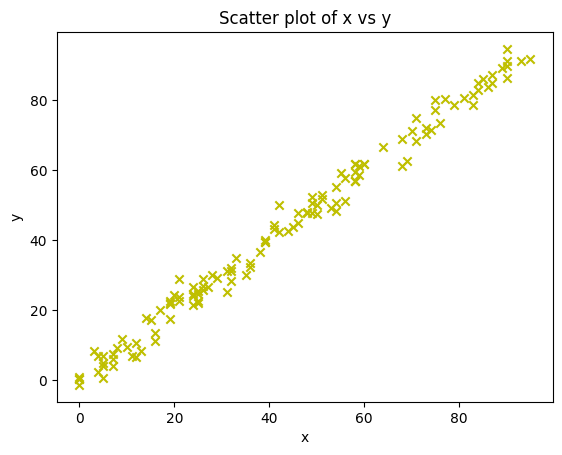

In [4]:
# Plot the data
plt.scatter(x_train, y_train, marker = 'x', c='y')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter plot of x vs y')
plt.show()

## Computing Cost

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 $$ $$\tag{1}$$
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b$$ $$\tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  

In [5]:
def compute_cost(x, y, w, b):
    """
    Computes the cost function for univariate linear regression

    Args:
        x (ndarray (m,)) : features
        y (ndarray (m,)) : targets
        w,b (scalar) : model parameters ( weight and bias respectively)
        
    returns : 
        cost (float ) : the cost for the current model
    """
    m = x.shape[0]
    j_wb = 0
    for i in range(m):
        j_wb += ((w*x[i]+b) - y[i])**2
    j_wb/=2*m
    return j_wb

## Gradient descent

*Gradient descent* is described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w}   \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
$$\tag{3}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)}
\end{align}
$$
$$
\tag{4}
$$
$$
\begin{align}
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})
\end{align}
$$
$$
\tag{5}
$$

### compute_gradient
`compute_gradient`  implements (4) and (5) above and returns $\frac{\partial J(w,b)}{\partial w}$,$\frac{\partial J(w,b)}{\partial b}$.

In [6]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for univariate linear regression
    
    Args:
        x (ndarray (m,)) : features
        y (ndarray (m,)) : targets
        w,b (scalar) : model parameters ( weight and bias respectively)
        
    returns : 
        dj_w ( scalar ) : the gradient of the cost according to w 
        dj_b ( scalar ) : the gradient of the cost according to b 
    """
    m = x.shape[0]
    dj_w = 0
    dj_b = 0
    for i in range(m):
        dj_w += np.clip( ((w*x[i] + b) - y[i])*x[i], -1e10, 1e10)
        dj_b += np.clip(((w*x[i] + b) - y[i]), -1e10, 1e10)
    dj_w/=m
    dj_b/=m
    return dj_w, dj_b

###  Gradient Descent
Now that gradients can be computed,  gradient descent, described in equation (3) above can be implemented below in `gradient_descent`.

In [7]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    Performs gradient descent to fit w,b. Updates w,b by taking num_iters gradient steps with learning rate alpha
    
    Args:
        x (ndarray (m,)) : features
        y (ndarray (m,)) : targets
        w_in,b_in (scalar) :initial values of the  model parameters ( weight and bias respectively)
        alpha (float): Learning rate ( between 0 and 1 )
        num_iters (int):   number of iterations to run gradient descent
        cost_function:     function to call to produce cost
        gradient_function: function to call to produce gradient
      
    Returns:
        w (scalar): Updated value of parameter after running gradient descent
        b (scalar): Updated value of parameter after running gradient descent
        cost_history (List): History of cost values
        params_history (list): History of parameters [w,b] 
      """
    cost_history = []
    params_history = []
    
    b = b_in
    w = w_in
    
    for i in range(num_iters) :
        dj_w, dj_b = gradient_function(x, y, w, b)
        
        # update the parameters
        w = w - alpha*dj_w
        b = b - alpha*dj_b
    
        # Save the cost and the new values of the parameters
        if(i<100000):
            cost_history.append(cost_function(x, y, w, b))
            params_history.append([w,b])
            
        if i% math.ceil(num_iters/10) == 0:
             print(f"Iteration {i:4}: Cost {cost_history[-1]:0.2e} ",
                  f"dj_w: {dj_w: 0.3e}, dj_b: {dj_b: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
            
    return w, b, cost_history, params_history
        

In [8]:
# initialize parameters
w_in = 0
b_in = 0
num_iters = 100000
alpha = 0.0001
# run gradient descent
w_final, b_final, cost_history, params_history = gradient_descent(x_train, y_train, 
                                                                  w_in, b_in, alpha, 
                                                                  num_iters, compute_cost, 
                                                                  compute_gradient)

Iteration    0: Cost 7.10e+02  dj_w: -2.562e+03, dj_b: -4.299e+01   w:  2.562e-01, b: 4.29860e-03
Iteration 10000: Cost 3.99e+00  dj_w:  1.179e-03, dj_b: -7.043e-02   w:  9.963e-01, b: 9.80070e-02
Iteration 20000: Cost 3.98e+00  dj_w:  8.905e-04, dj_b: -5.320e-02   w:  9.953e-01, b: 1.59414e-01
Iteration 30000: Cost 3.98e+00  dj_w:  6.726e-04, dj_b: -4.018e-02   w:  9.945e-01, b: 2.05797e-01
Iteration 40000: Cost 3.98e+00  dj_w:  5.081e-04, dj_b: -3.035e-02   w:  9.939e-01, b: 2.40833e-01
Iteration 50000: Cost 3.98e+00  dj_w:  3.838e-04, dj_b: -2.293e-02   w:  9.935e-01, b: 2.67297e-01
Iteration 60000: Cost 3.98e+00  dj_w:  2.899e-04, dj_b: -1.732e-02   w:  9.931e-01, b: 2.87286e-01
Iteration 70000: Cost 3.98e+00  dj_w:  2.190e-04, dj_b: -1.308e-02   w:  9.929e-01, b: 3.02385e-01
Iteration 80000: Cost 3.98e+00  dj_w:  1.654e-04, dj_b: -9.880e-03   w:  9.927e-01, b: 3.13790e-01
Iteration 90000: Cost 3.98e+00  dj_w:  1.249e-04, dj_b: -7.463e-03   w:  9.926e-01, b: 3.22405e-01


### Cost versus iterations of gradient descent 


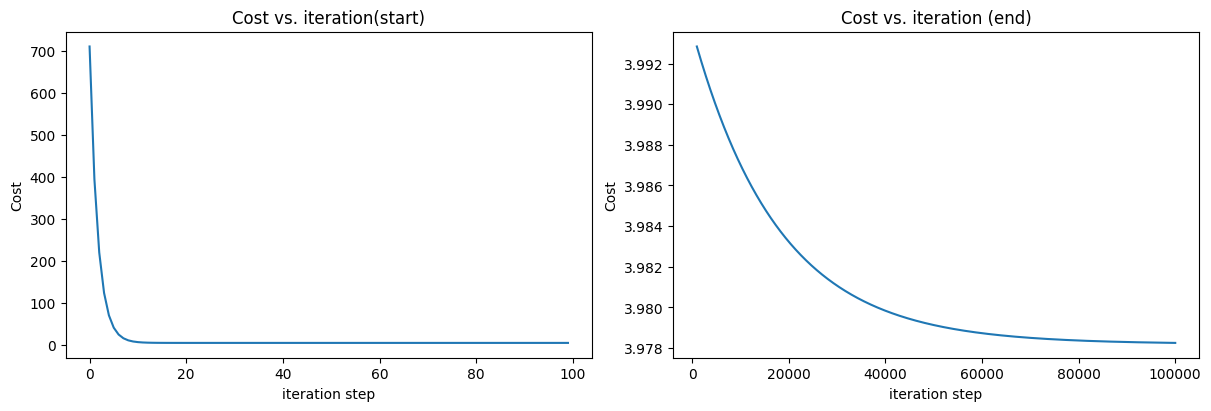

In [9]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(cost_history[:100])
ax2.plot(1000 + np.arange(len(cost_history[1000:])), cost_history[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

## Model Evaluation

In [10]:
y_hat = np.dot(x_train,w_final) + b_final

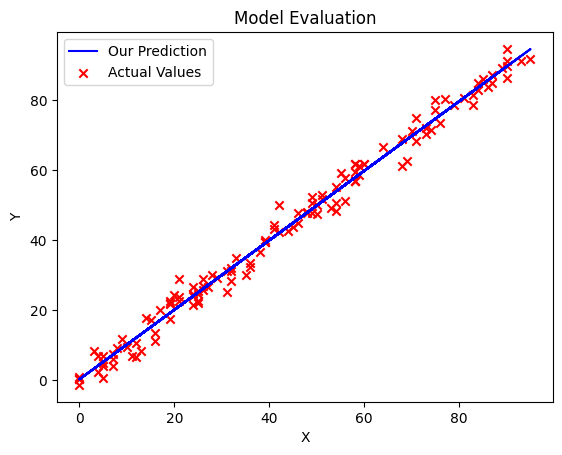

In [11]:
# Plot our model prediction
plt.plot(x_train, y_hat , c='b',label='Our Prediction')
# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Model Evaluation")
# Set the y-axis label
plt.ylabel('Y')
# Set the x-axis label
plt.xlabel('X')
plt.legend()
plt.show()